In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
articles = pd.read_csv("../Data/articles.csv")

In [3]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [5]:
# for i in articles.columns:
#     print(i, +" "+(articles[i].nunique()))

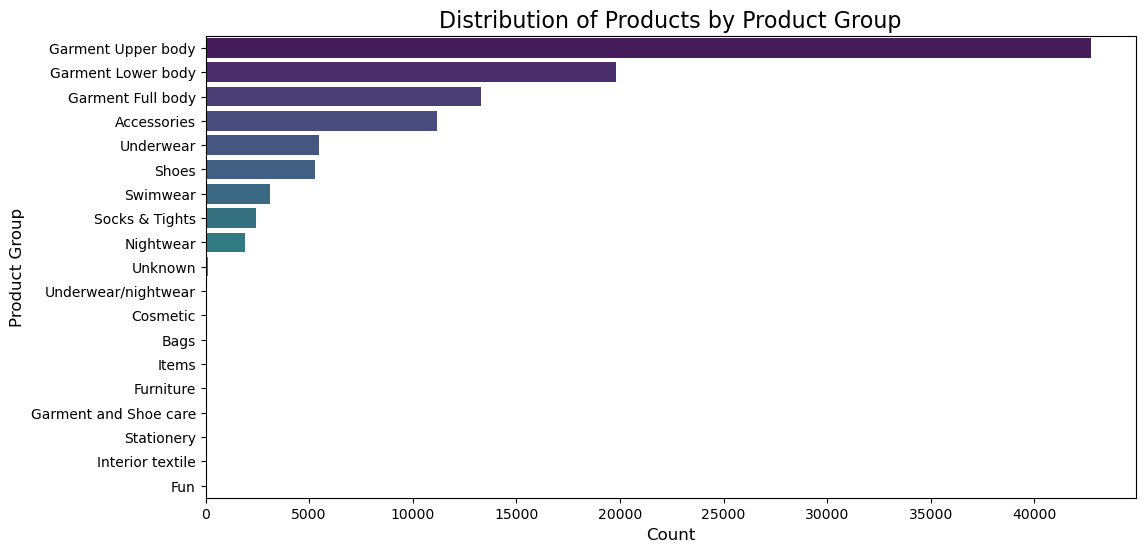

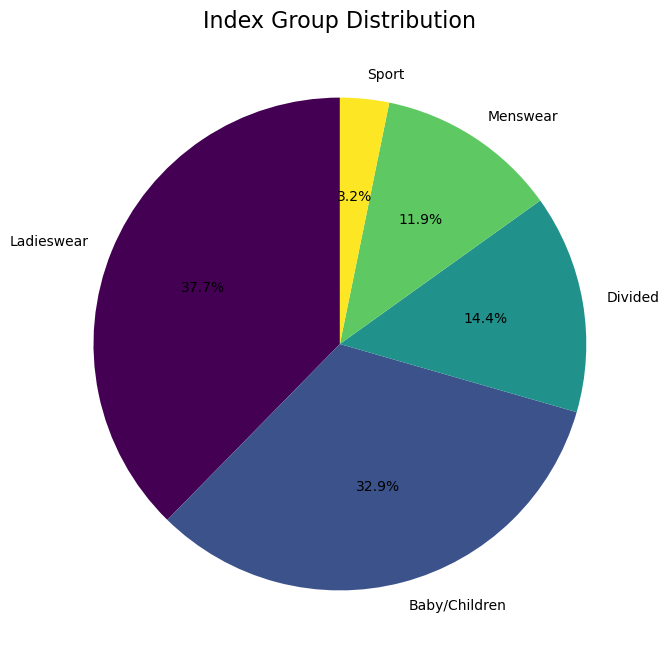

In [6]:
# Count of products by product group
product_group_counts = articles['product_group_name'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=product_group_counts.values, y=product_group_counts.index, palette="viridis")
plt.title("Distribution of Products by Product Group", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Product Group", fontsize=12)
plt.show()

# Count of index groups
index_group_counts = articles['index_group_name'].value_counts()

# Pie chart for index groups
plt.figure(figsize=(8, 8))
index_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap="viridis")
plt.title("Index Group Distribution", fontsize=16)
plt.ylabel("")
plt.savefig("../Data/Analysis_images/product_group_distribution.png",dpi=300, bbox_inches='tight')
plt.show()


### Product group   Vs     Index group

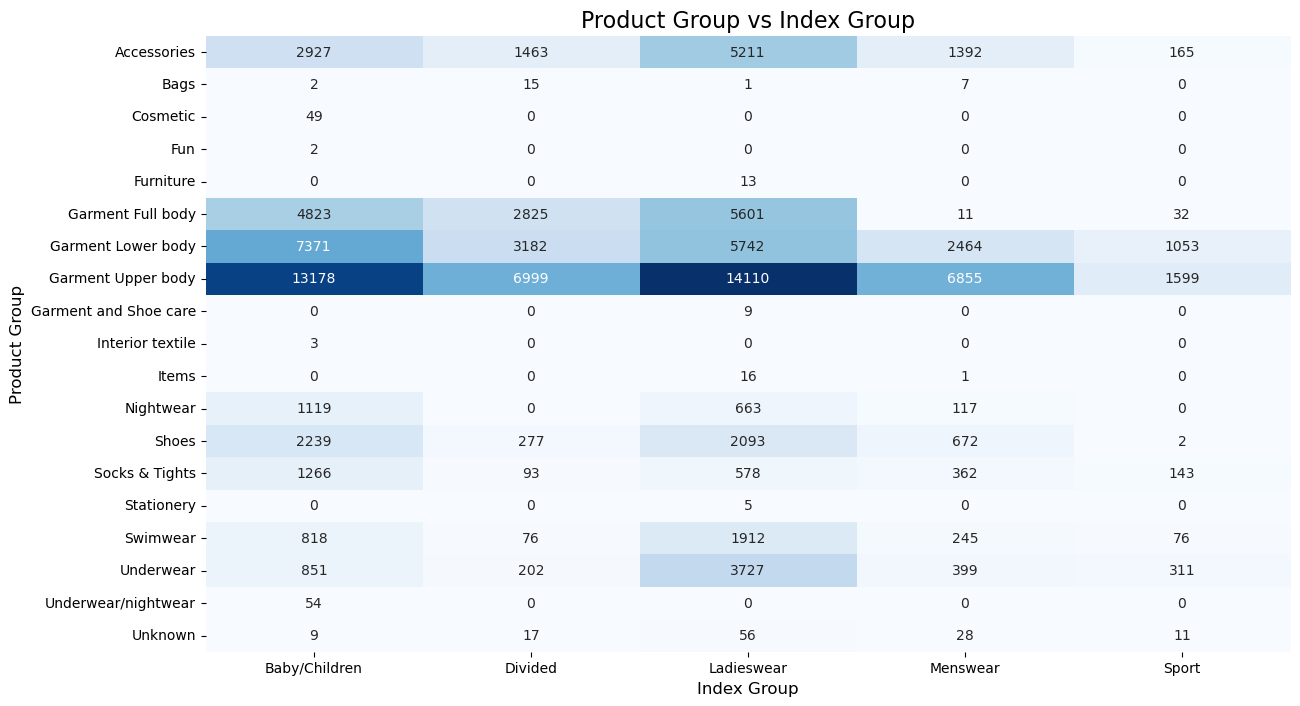

In [7]:
# Relationship between product group and index group
plt.figure(figsize=(14, 8))
group_index_pivot = articles.pivot_table(
    index='product_group_name', 
    columns='index_group_name', 
    values='article_id', 
    aggfunc='count',
    fill_value=0
)
sns.heatmap(group_index_pivot, cmap="Blues", annot=True, fmt="d", cbar=False)
plt.title("Product Group vs Index Group", fontsize=16)
plt.xlabel("Index Group", fontsize=12)
plt.ylabel("Product Group", fontsize=12)
plt.savefig("../Data/Analysis_images/Product group Vs Index group.png",dpi=100, bbox_inches='tight')
plt.show()


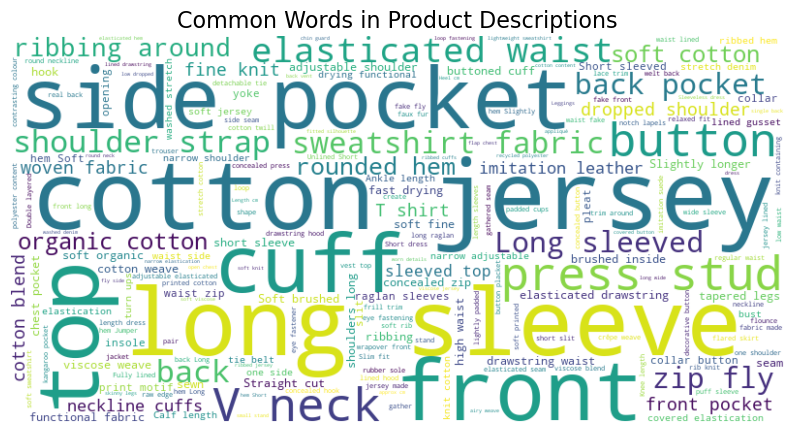

In [8]:
# !pip install WordCloud
from wordcloud import WordCloud

# Concatenating all descriptions
all_text = " ".join(articles['detail_desc'].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Common Words in Product Descriptions", fontsize=16)
plt.savefig("../Data/Analysis_images/words_cloud.png",dpi=100, bbox_inches='tight')
plt.show()


## Data Integrity Checks


### Data Duplication Check 

In [9]:
# Check unique values in key columns
print("Unique Articles:", articles['article_id'].nunique())
print("Unique Product Codes:", articles['product_code'].nunique())
print("Unique Product Groups:", articles['product_group_name'].nunique())

# Verify if each article has a unique `article_id`
if articles['article_id'].is_unique:
    print("Each article has a unique ID.")
else:
    print("Duplicate article IDs found!")

# Inspect anomalies in categorical data
for col in ['perceived_colour_value_name', 'perceived_colour_master_name', 'garment_group_name']:
    print(f"\n{col} Unique Values:\n", articles[col].unique())


Unique Articles: 105542
Unique Product Codes: 47224
Unique Product Groups: 19
Each article has a unique ID.

perceived_colour_value_name Unique Values:
 ['Dark' 'Light' 'Dusty Light' 'Medium Dusty' 'Bright' 'Medium' 'Undefined'
 'Unknown']

perceived_colour_master_name Unique Values:
 ['Black' 'White' 'Beige' 'Grey' 'Blue' 'Pink' 'Lilac Purple' 'Red' 'Mole'
 'Orange' 'Metal' 'Brown' 'Turquoise' 'Yellow' 'Khaki green' 'Green'
 'undefined' 'Unknown' 'Yellowish Green' 'Bluish Green']

garment_group_name Unique Values:
 ['Jersey Basic' 'Under-, Nightwear' 'Socks and Tights' 'Jersey Fancy'
 'Accessories' 'Trousers Denim' 'Outdoor' 'Shoes' 'Swimwear' 'Knitwear'
 'Shirts' 'Trousers' 'Dressed' 'Shorts' 'Dresses Ladies' 'Skirts'
 'Special Offers' 'Blouses' 'Unknown' 'Woven/Jersey/Knitted mix Baby'
 'Dresses/Skirts girls']


### Category Insights

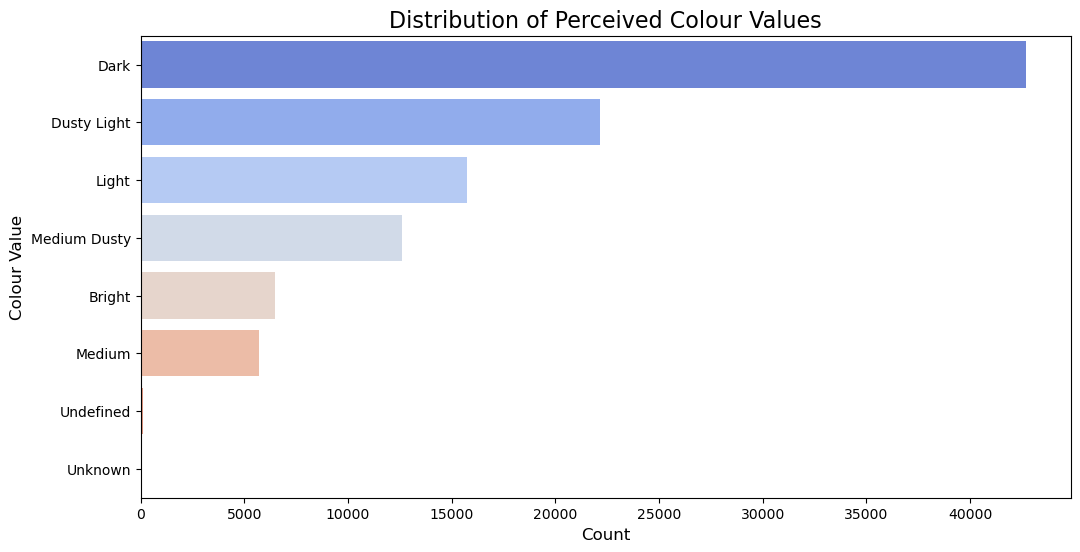

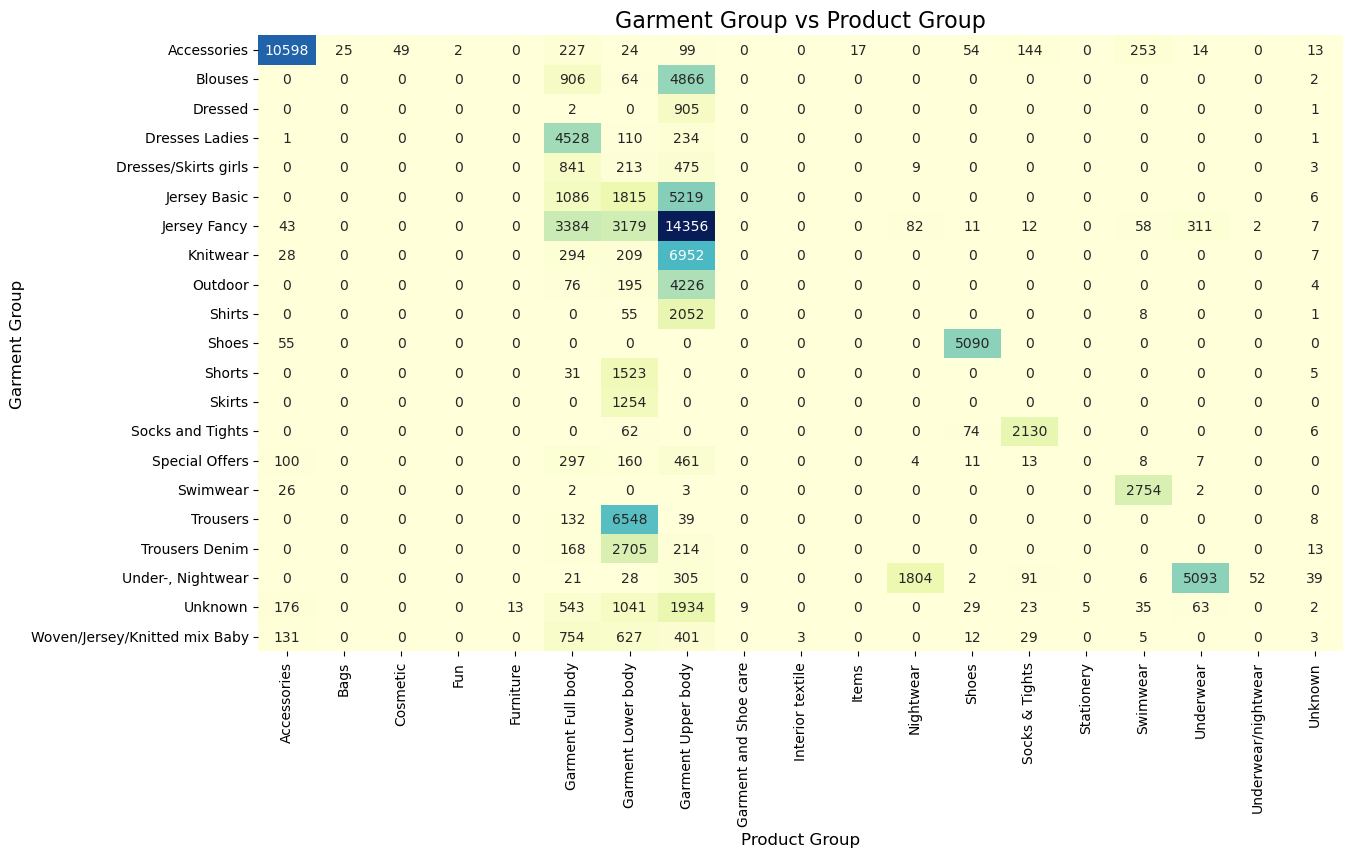

In [10]:
# Distribution of perceived colour values
colour_value_counts = articles['perceived_colour_value_name'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=colour_value_counts.values, y=colour_value_counts.index, palette="coolwarm")
plt.title("Distribution of Perceived Colour Values", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Colour Value", fontsize=12)
plt.show()

# Relationship between garment group and product group
plt.figure(figsize=(14, 8))
garment_product_pivot = articles.pivot_table(
    index='garment_group_name',
    columns='product_group_name',
    values='article_id',
    aggfunc='count',
    fill_value=0
)
sns.heatmap(garment_product_pivot, cmap="YlGnBu", annot=True, fmt="d", cbar=False)
plt.title("Garment Group vs Product Group", fontsize=16)
plt.xlabel("Product Group", fontsize=12)
plt.ylabel("Garment Group", fontsize=12)
plt.savefig("../Data/Analysis_images/Distribution of Perceived Colour Values.png",dpi=100, bbox_inches='tight')
plt.show()


### Co-occurrence analysis

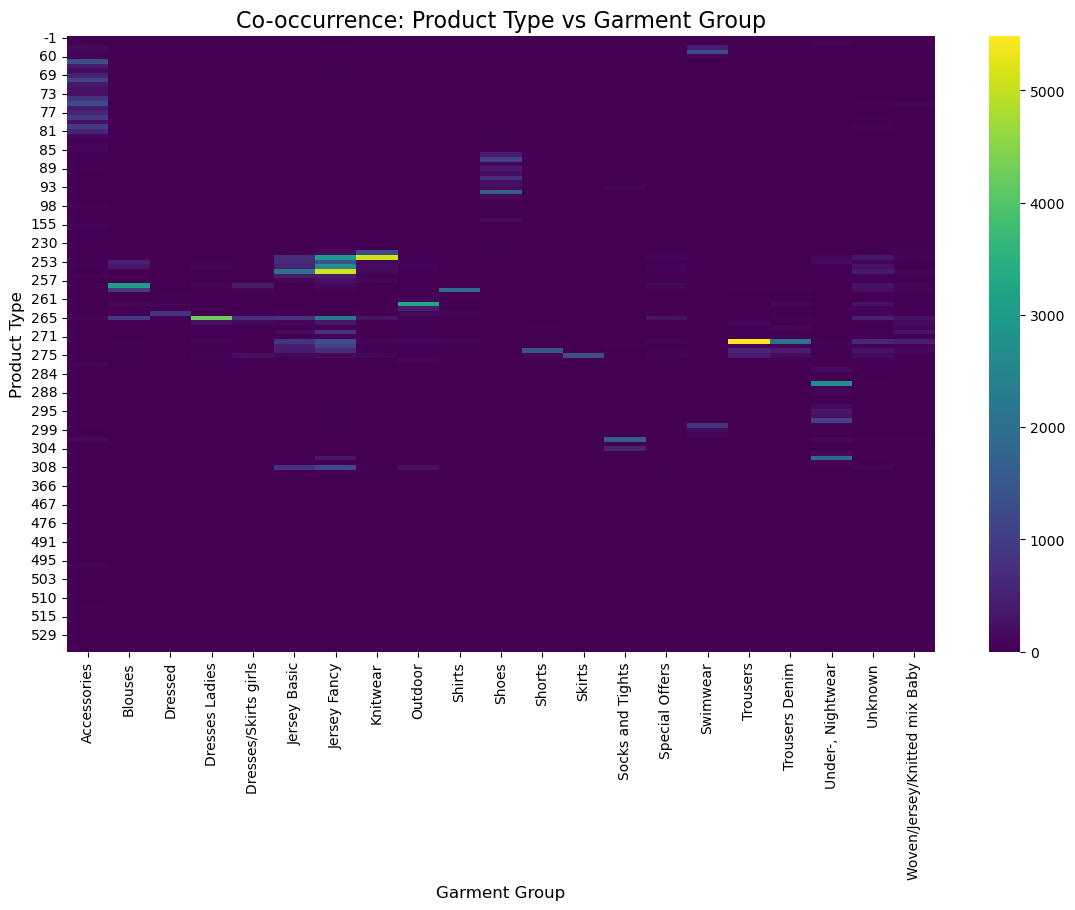

In [11]:
# Co-occurrence matrix for product type and garment group
co_occurrence = pd.crosstab(
    articles['product_type_no'],
    articles['garment_group_name']
)

plt.figure(figsize=(14, 8))
sns.heatmap(co_occurrence, cmap="viridis", cbar=True)
plt.title("Co-occurrence: Product Type vs Garment Group", fontsize=16)
plt.xlabel("Garment Group", fontsize=12)
plt.ylabel("Product Type", fontsize=12)
plt.savefig("../Data/Analysis_images/Co-occurrence matrix.png",dpi=100, bbox_inches='tight')
plt.show()


## Data Cleaning and Curating


Null Values in Dataset:
article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64


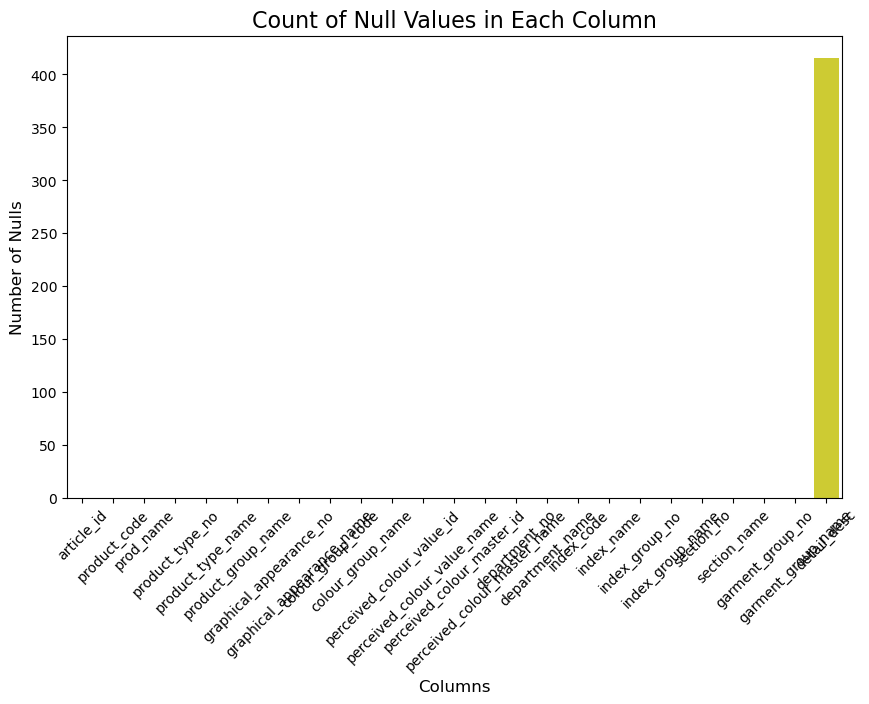

In [12]:
# Check for null values in the dataset
null_counts = articles.isnull().sum()
print("Null Values in Dataset:")
print(null_counts)

# Visualize the null values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")
plt.title("Count of Null Values in Each Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Nulls", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [13]:
articles.dropna()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [14]:
articles['detail_desc'] = articles.apply(
    lambda row: f"{row['section_name']} {row['detail_desc']}" if pd.notnull(row['section_name']) else row['detail_desc'],
    axis=1
)


In [15]:
print(articles['detail_desc'][0])

Womens Everyday Basics Jersey top with narrow shoulder straps.


In [18]:
processed_filepath = "curated.csv"
articles.to_csv(processed_filepath, index=False)